In [4]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InR

In [5]:
!pip install bs4

In [6]:
!pip install html.parser

     |████████████████████████████████| 49 kB 3.1 MB/s 
  Created wheel for html.parser: filename=html_parser-0.2-py3-none-any.whl size=1329 sha256=8bd3fe5a1a949add0f2de75e0de81dcb18f76891139b9a4dc8985358e44898aa
  Stored in directory: /root/.cache/pip/wheels/11/86/38/0554afea46105c70bae8d223c427bba371aa0c83ce88d57b27
Successfully built html.parser


In [7]:
import time
import bs4 as BeautifulSoup
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


In [ ]:
year =[]
org =[]
name = []
proposal =[]
for i in range(2019,2021):
  driver.get(f"https://developers.google.com/season-of-docs/docs/{i}/participants")
  time.sleep(2)
  html = driver.page_source
  soup = BeautifulSoup.BeautifulSoup(html)
  data = []
  table = soup.find('table')
  table_body = table.find('tbody')

  rows = table_body.find_all('tr')
  for row in rows:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])
  

  for r in range(len(data)):
      org.append(data[r][0])
      name.append(data[r][1])
      proposal.append(data[r][-1])
      year.append(i)
      print(len(year))
      print(len(name))
 

In [9]:
print(len(year))
print(len(org))
print(len(name))

123
123
123


In [ ]:
name

In [27]:
new_proposal =[]
import re
for p in proposal:
  p = re.sub(r'\n', '', p)
  p = re.sub(' +', ' ', p)
  new_proposal.append(p)




In [29]:
import pandas as pd
d = {'year':year,'organization':org,'names':name,'proposal':new_proposal}
df =pd.DataFrame(d)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          123 non-null    int64 
 1   organization  123 non-null    object
 2   names         123 non-null    object
 3   proposal      123 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.0+ KB


In [32]:
df

,year,organization,names,proposal
0,2019,AboutCode,ayansinha,Reference for Command Line Options in scancode...
1,2019,Apache Airflow,kartik khare,How to create a workflow
2,2019,Apache Airflow,lavel,Documenting using local development environments
3,2019,Apache Cassandra,dvohra,Resolve TODOs in Apache Cassandra Documentation
4,2019,Arduino,AghaSaad04,Document third-party libraries
...,...,...,...,...
118,2020,VLC,Avii,Create the VLC User Documentation for one mobi...
119,2020,Webots,Soft illusion Channel,Video Tutorials series for Webots (Integration...
120,2020,Wireshark,Alex Nik,To document 35 menu items
121,2020,WordPress,dmivelli,Improve Article Discoverability in WordPress H...


In [14]:
year_org =df.groupby(['year','organization']).size()
year_org

year  organization    
2019  AboutCode           1
      Apache Airflow      2
      Apache Cassandra    1
      Arduino             1
      BRL-CAD             1
                         ..
2020  VLC                 2
      Webots              1
      Wireshark           1
      WordPress           2
      gRPC-Gateway        1
Length: 86, dtype: int64

In [47]:
df.organization[0]

'AboutCode'

In [16]:
org_and_participant_name = df.groupby(['organization','names']).size()
org_and_participant_name 

organization                 names            
AboutCode                    ayansinha            1
Apache Airflow               kartik khare         1
                             lavel                1
Apache Beam                  Sruthi Sree Kumar    1
Apache Cassandra             dvohra               1
                                                 ..
Wireshark                    Alex Nik             1
WordPress                    dmivelli             1
                             tacitonic            1
Zulip Open Source Team Chat  drrosa               1
gRPC-Gateway                 iamrajiv             1
Length: 122, dtype: int64

In [50]:
org_greater_than_2 =[]
number = []
org_and_numberof_times_appeared =df.groupby(['organization']).size()
for i in range(len(org_and_numberof_times_appeared)):
  if org_and_numberof_times_appeared[i]>1:
    number.append(org_and_numberof_times_appeared[i])
    org_greater_than_2.append(df.organization[i])




In [52]:
print(org_greater_than_2,number)

['Apache Airflow', 'DVC.org', 'Ensembl', 'GDevelop', 'GenPipes', 'HPX', 'MDAnalysis', 'National Resource for Network Biology (NRNB)', 'Open Source Geospatial Foundation', 'OpenELIS Global', 'Open Food Facts', 'OpenSCAD', 'OWASP Foundation', 'Qubes OS', 'Rocket.Chat', 'SymPy', 'The Wikimedia Foundation', 'Tor Project', 'Bokeh', 'CERN-HSF', 'CircuitVerse', 'CircuitVerse', 'Creative Commons', 'DIPY', 'Django', 'DVC', 'Electron', 'ESLint', 'FOLIO', 'Global Wordnet Association', 'gRPC-Gateway'] [2, 5, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 4, 2, 2, 2]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


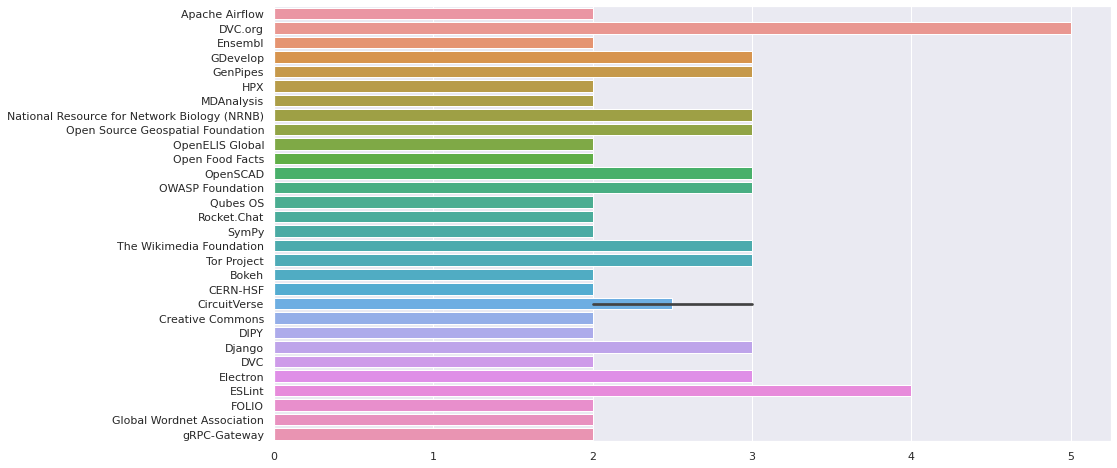

In [61]:
import seaborn as sns
sns.barplot(number,org_greater_than_2)

sns.set(rc = {'figure.figsize':(20,8)})